In [80]:
import pandas as pd
import numpy as np
import os
import wrangle
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.model_selection import train_test_split
import sklearn.preprocessing

In [2]:
df = wrangle.prep_bees()

In [3]:
df

,state,year,season,beekeepers,total_loss,average_loss,starting_colonies,colonies_lost,ending_colonies,beekeepers_exclusive_to_state,colonies_exclusive_to_state
2184,alabama,2022,annual,33,36.488812,34.260096,316,212,369,100.000000,100.000000
2236,alabama,2022,summer,40,23.462783,25.660329,401,145,473,100.000000,100.000000
2288,alabama,2022,winter,42,19.053254,18.196327,747,161,684,100.000000,100.000000
2187,arkansas,2022,annual,18,51.254480,53.867865,152,143,136,94.444444,97.368421
2239,arkansas,2022,summer,22,14.383562,14.504890,181,42,250,95.454545,97.790055
...,...,...,...,...,...,...,...,...,...,...,...
147,utah,2008,winter,28,24.781100,42.183693,17709,4500,13659,100.000000,100.000000
151,west_virginia,2008,winter,17,51.566202,30.333759,3399,1959,1840,94.117647,63.959988
4831,west_virginia,2008,winter,16,35.130581,27.295408,2174,834,1540,100.000000,100.000000
152,wisconsin,2008,winter,15,33.831962,48.489233,6122,2714,5308,93.333333,56.713492


In [8]:
df = df[df.season == 'annual']

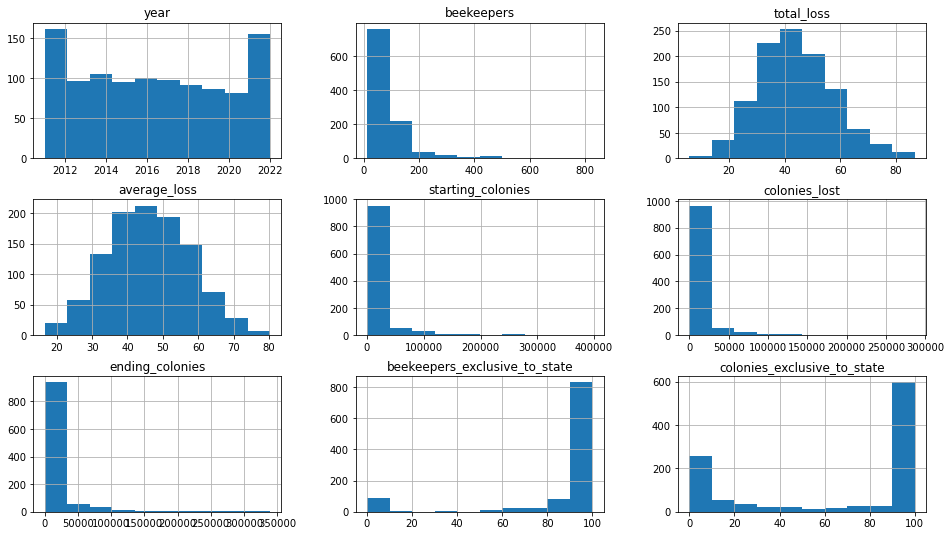

In [26]:
df.hist(figsize=[16,9])
plt.show()

### Distribution for total_loss and average_loss is normal. The starting_colonies, colonies_lost, and ending_colonies columns are skewed, possibly due to an extreme outlier.

In [10]:
df.describe()

,year,beekeepers,total_loss,average_loss,starting_colonies,colonies_lost,ending_colonies,beekeepers_exclusive_to_state,colonies_exclusive_to_state
count,1070.000000,1070.000000,1070.000000,1070.000000,1070.000000,1070.000000,1070.000000,1070.000000,1070.000000
mean,2016.379439,84.771963,44.178617,46.041838,15875.586916,10408.074766,15675.825234,86.604388,64.804368
std,3.321268,100.339677,13.660125,11.647444,43204.389246,28205.483202,42109.813700,28.138881,42.864251
min,2011.000000,11.000000,5.707065,16.544983,27.000000,16.000000,22.000000,0.000000,0.000000
25%,2014.000000,26.000000,34.536716,37.711144,358.000000,288.000000,346.000000,91.176471,12.007747
50%,2016.000000,57.000000,42.643478,45.533138,1007.500000,765.000000,907.000000,98.098252,97.336502
75%,2019.000000,101.750000,53.108463,54.267300,8629.000000,5539.500000,8801.500000,100.000000,100.000000
max,2022.000000,828.000000,86.889007,80.343204,397076.000000,286768.000000,339129.000000,100.000000,100.000000


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1070 entries, 2184 to 5196
Data columns (total 11 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   state                          1070 non-null   object 
 1   year                           1070 non-null   int64  
 2   season                         1070 non-null   object 
 3   beekeepers                     1070 non-null   int64  
 4   total_loss                     1070 non-null   float64
 5   average_loss                   1070 non-null   float64
 6   starting_colonies              1070 non-null   int64  
 7   colonies_lost                  1070 non-null   int64  
 8   ending_colonies                1070 non-null   int64  
 9   beekeepers_exclusive_to_state  1070 non-null   float64
 10  colonies_exclusive_to_state    1070 non-null   float64
dtypes: float64(4), int64(5), object(2)
memory usage: 100.3+ KB


In [17]:
df[df.ending_colonies == df.ending_colonies.max()]

,state,year,season,beekeepers,total_loss,average_loss,starting_colonies,colonies_lost,ending_colonies,beekeepers_exclusive_to_state,colonies_exclusive_to_state
784,california,2013,annual,212,45.817123,46.902526,397076,286768,339129,64.150943,11.513161


In [21]:
df[df.colonies_lost == df.colonies_lost.max()]

,state,year,season,beekeepers,total_loss,average_loss,starting_colonies,colonies_lost,ending_colonies,beekeepers_exclusive_to_state,colonies_exclusive_to_state
784,california,2013,annual,212,45.817123,46.902526,397076,286768,339129,64.150943,11.513161


In [22]:
df[df.starting_colonies == df.starting_colonies.max()]

,state,year,season,beekeepers,total_loss,average_loss,starting_colonies,colonies_lost,ending_colonies,beekeepers_exclusive_to_state,colonies_exclusive_to_state
784,california,2013,annual,212,45.817123,46.902526,397076,286768,339129,64.150943,11.513161


In [36]:
df[df.beekeepers == df.beekeepers.max()]

,state,year,season,beekeepers,total_loss,average_loss,starting_colonies,colonies_lost,ending_colonies,beekeepers_exclusive_to_state,colonies_exclusive_to_state
973,pennsylvania,2014,annual,828,45.755071,54.477853,20925,17661,20938,97.94686,20.683393


In [13]:
def split_data(df):
    '''This function takes in a dataframe and returns three dataframes, a training dataframe with 60 percent 
        of the data, a validate dataframe with 20 percent of the data and test dataframe with 20 percent of the data.'''
    # split data into train and test with a test size of 20 percent and random state of 825
    train, test = train_test_split(df, test_size=.2, random_state=825)
    # split train again into train and validate with a validate size of 25 percent of train
    train, validate = train_test_split(train, test_size=.25, random_state=825)
    # return three dataframes, 60/20/20 split
    return train, validate, test

In [29]:
train, validate, test = split_data(df)

In [30]:
train.shape, validate.shape, test.shape

((642, 11), (214, 11), (214, 11))

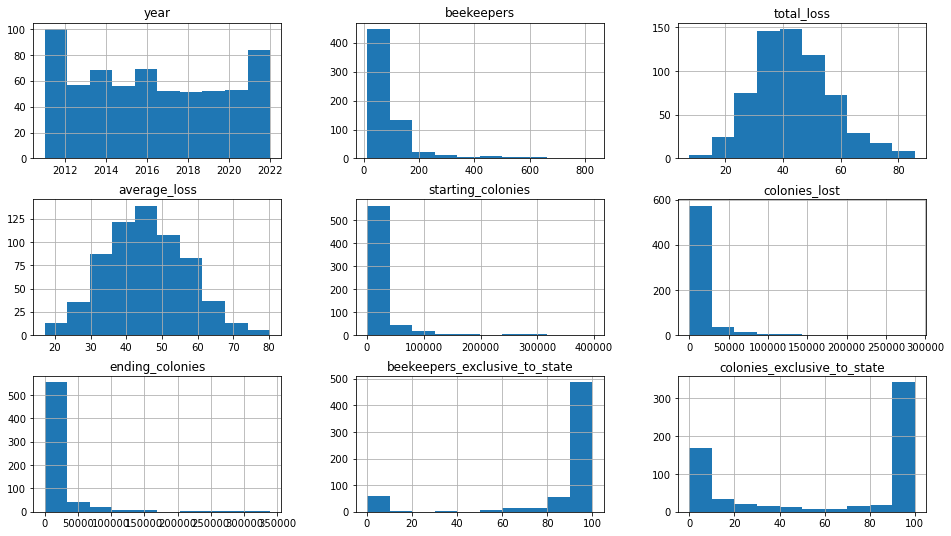

In [37]:
train.hist(figsize=[16,9])
plt.show()

<Figure size 1152x648 with 0 Axes>

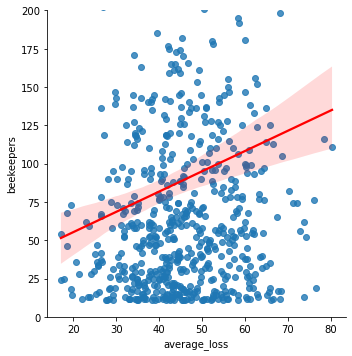

In [55]:
# relationship between total_loss and beekeepers with regression line
plt.figure(figsize=[16,9])
sns.lmplot(x='average_loss', y='beekeepers', data=train, line_kws={'color': 'red'})
plt.ylim([0,200])
plt.title('')
plt.show()

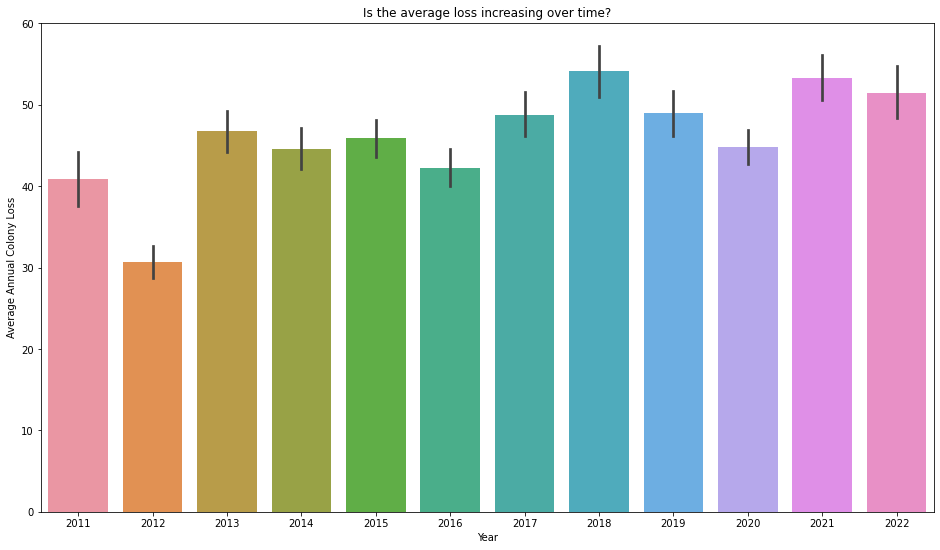

In [54]:
plt.figure(figsize=[16,9])
sns.barplot(x='year', y='average_loss', data=train)
plt.ylabel('Average Annual Colony Loss')
plt.xlabel('Year')
plt.title('Is the average loss increasing over time?')
plt.show()

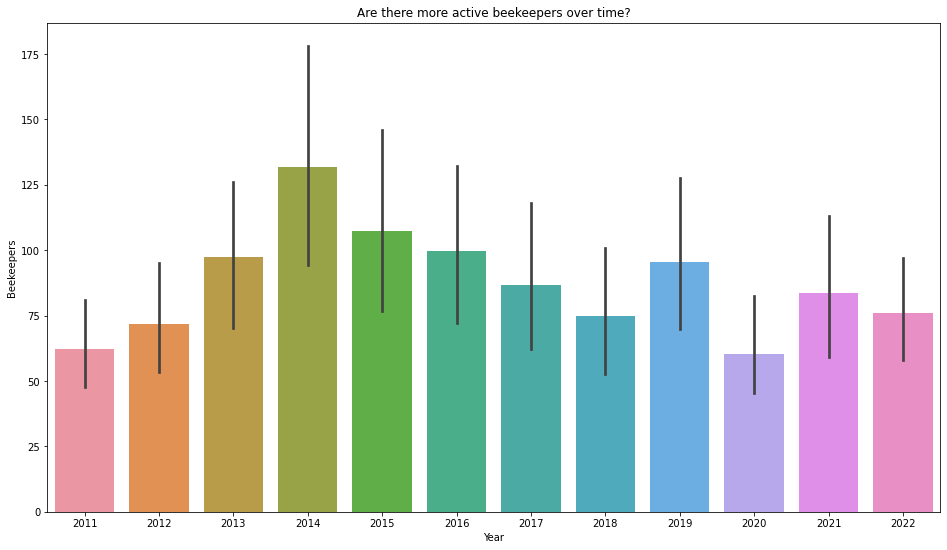

In [56]:
plt.figure(figsize=[16,9])
sns.barplot(x='year', y='beekeepers', data=train)
plt.ylabel('Beekeepers')
plt.xlabel('Year')
plt.title('Are there more active beekeepers over time?')
plt.show()

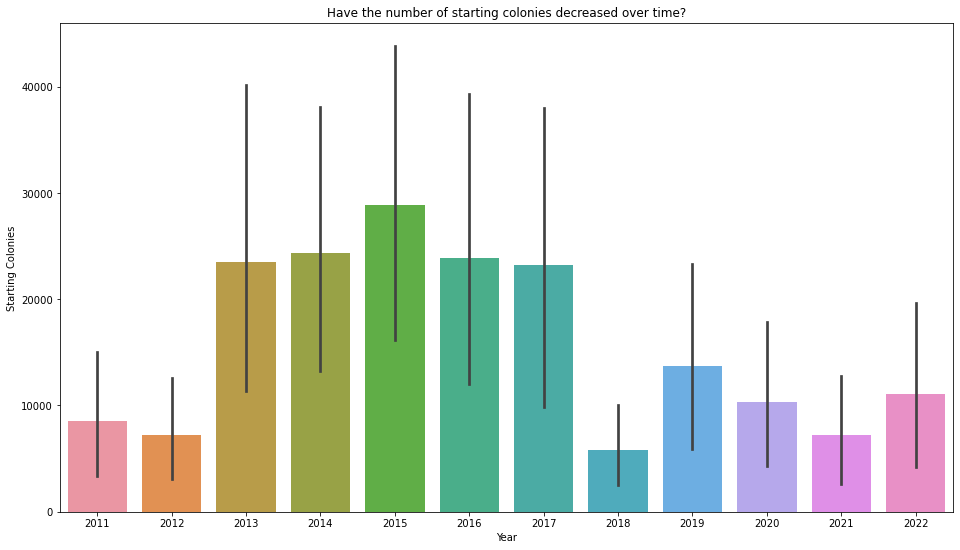

In [61]:
plt.figure(figsize=[16,9])
sns.barplot(x='year', y='starting_colonies', data=train)
plt.ylabel('Starting Colonies')
plt.xlabel('Year')
plt.title('Have the number of starting colonies decreased over time?')
plt.show()

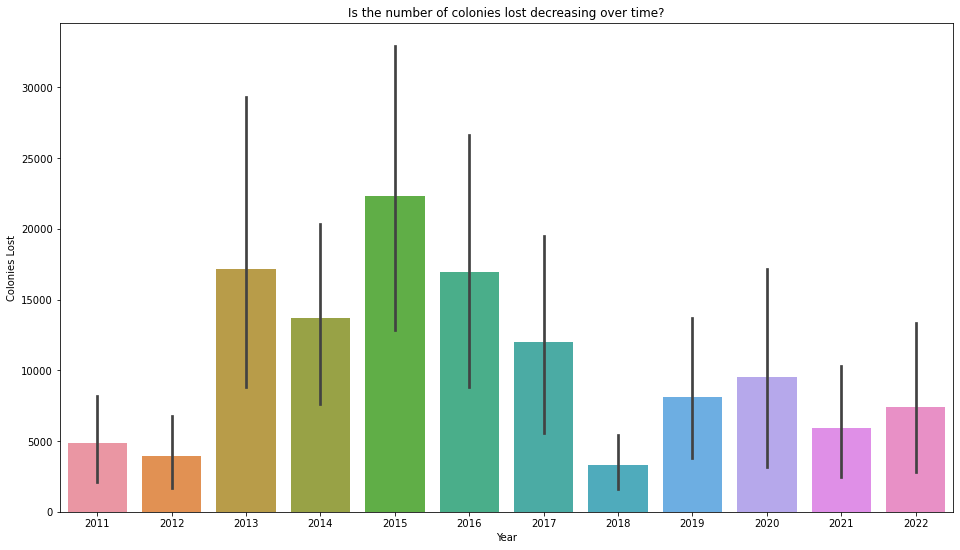

In [63]:
plt.figure(figsize=[16,9])
sns.barplot(x='year', y='colonies_lost', data=train)
plt.ylabel('Colonies Lost')
plt.xlabel('Year')
plt.title('Is the number of colonies lost decreasing over time?')
plt.show()

In [67]:
bee_corr = train.corr()
bee_corr

,year,beekeepers,total_loss,average_loss,starting_colonies,colonies_lost,ending_colonies,beekeepers_exclusive_to_state,colonies_exclusive_to_state
year,1.000000,-0.039952,0.286603,0.359497,-0.054971,-0.044408,-0.061335,0.083099,0.084994
beekeepers,-0.039952,1.000000,0.039990,0.136129,0.005793,0.016509,0.004454,0.212356,0.105177
total_loss,0.286603,0.039990,1.000000,0.520963,-0.131532,-0.051208,-0.151212,0.128975,0.163358
average_loss,0.359497,0.136129,0.520963,1.000000,-0.082842,-0.053246,-0.090191,0.142036,0.030770
starting_colonies,-0.054971,0.005793,-0.131532,-0.082842,1.000000,0.972680,0.994828,-0.610900,-0.479438
colonies_lost,-0.044408,0.016509,-0.051208,-0.053246,0.972680,1.000000,0.957940,-0.601115,-0.489169
ending_colonies,-0.061335,0.004454,-0.151212,-0.090191,0.994828,0.957940,1.000000,-0.616280,-0.483112
beekeepers_exclusive_to_state,0.083099,0.212356,0.128975,0.142036,-0.610900,-0.601115,-0.616280,1.000000,0.632174
colonies_exclusive_to_state,0.084994,0.105177,0.163358,0.030770,-0.479438,-0.489169,-0.483112,0.632174,1.000000


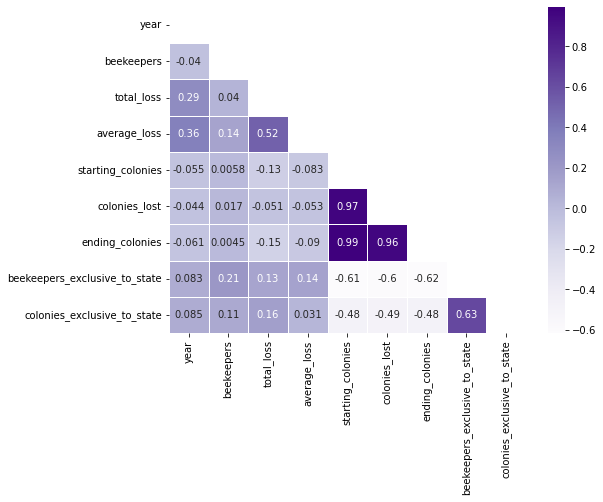

In [68]:
plt.figure(figsize=(8,6))
sns.heatmap(bee_corr, cmap='Purples', annot=True, linewidth=0.5, mask= np.triu(bee_corr))

plt.show()

In [72]:
cross = pd.crosstab(train.average_loss, train.year)
corr1 = cross.corr()
corr1

year,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
year,,,,,,,,,,,,
2011,1.000000,-0.084308,-0.087730,-0.096736,-0.086883,-0.097530,-0.083438,-0.082562,-0.083438,-0.084308,-0.076237,-0.072447
2012,-0.084308,1.000000,-0.093635,-0.103247,-0.092731,-0.104094,-0.089055,-0.088119,-0.089055,-0.089983,-0.081368,-0.077324
2013,-0.087730,-0.093635,1.000000,-0.107438,-0.096495,-0.108320,-0.092669,-0.091696,-0.092669,-0.093635,-0.084671,-0.080462
2014,-0.096736,-0.103247,-0.107438,1.000000,-0.106401,-0.119439,-0.102182,-0.101109,-0.102182,-0.103247,-0.093363,-0.088722
2015,-0.086883,-0.092731,-0.096495,-0.106401,1.000000,-0.107273,-0.091774,-0.090811,-0.091774,-0.092731,-0.083853,-0.079685
2016,-0.097530,-0.104094,-0.108320,-0.119439,-0.107273,1.000000,-0.103020,-0.101939,-0.103020,-0.104094,-0.094129,-0.089450
2017,-0.083438,-0.089055,-0.092669,-0.102182,-0.091774,-0.103020,1.000000,-0.087210,-0.088136,-0.089055,-0.080529,-0.076526
2018,-0.082562,-0.088119,-0.091696,-0.101109,-0.090811,-0.101939,-0.087210,1.000000,-0.087210,-0.088119,-0.079683,-0.075722
2019,-0.083438,-0.089055,-0.092669,-0.102182,-0.091774,-0.103020,-0.088136,-0.087210,1.000000,-0.089055,-0.080529,-0.076526


<AxesSubplot:xlabel='year', ylabel='year'>

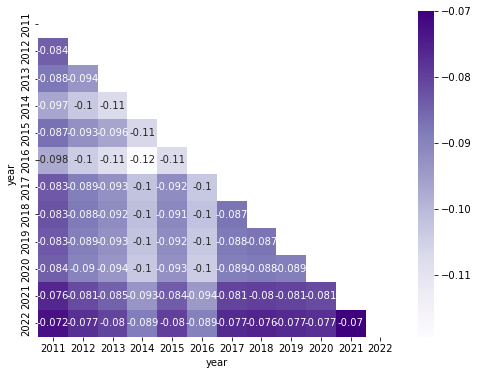

In [73]:
plt.figure(figsize=[8,6])
sns.heatmap(corr1, cmap='Purples', annot=True, mask=np.triu(corr1))

<AxesSubplot:xlabel='year', ylabel='average_loss'>

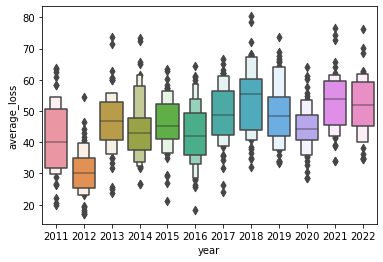

In [77]:
fig, ax = plt.subplots()
sns.boxenplot(x='year', y='average_loss', data=train)
#sns.regplot(x='year', y='average_loss', data=train, color='red')

In [78]:
X_train = train.drop(columns='total_loss')
y_train = train.total_loss
X_validate = validate.drop(columns='total_loss')
y_validate = validate.total_loss
X_test = test.drop(columns='total_loss')
y_test = test.total_loss

In [83]:
train.state.nunique()

50